# Theory and Documentation

## Environment

### History $H_t$

A sequence of observations, actions, rewards: $H_t = 0_1, R_1, A_1, ..., A_{t_1}, O_t, R_t$

### State $S_t$

The information used to determine what happens next (based on history): $S_t = f(H_t)$
* Environment State: $S_t^e$
* Agent State: $S_t^a = f(H_t)$

#### Information State (Markov State)

A state $S_t$ is Markov if and only if $\mathbb{P}[S_{t+1} | S_t] = \mathbb{P}[S_{t+1} | S_1, ..., S_t]$

> "The future is independent of the past given the present"

$$ H_{1:t} \rightarrow S_t \rightarrow H_{t+1:\infty} $$
* Once the state is known, the history may be thrown away
* $S_t^e$ and $H_t$ are both Markov

####  Fully Observable Environments

Agent directly observes environment state (MDP): $O_t = S_t^a = S_t^e$

### Markov Decision Processes (MDP)

Markov decision processes formally describe an environment for RL where the environment is **fully observable**

#### Markov Processes

###### Markov Property $<S>$
* State $S_t$ is Markov: $\mathbb{P}[S_{t+1}|S_t]=\mathbb{P}[S_{t+1}|S_1, ..., S_t]$
* Transition probability is defined by: $P_{ss'}=\mathbb{P}[S_{t+1}=s'|S_t=s]$
* State transition matrix $P$ defines transition probabilities from all states $s$ to all successor states $s'$

###### Markov Process (Markov Chain) $<S,P>$
A memoryless random process, i.e. a sequence of random states $S_1, S_2,...$ with the Markov property

* $S$ is a (finite) set of states
* $P$ is a state transition probability matrix, $P_{ss'}=\mathbb{P}[S_{t+1}=s'|S_t=s]$

#### Markov Reward Process

###### Markov Reward Process $<S,P,R,\gamma>$
A Markov chain with values
* $S$ is a finite set of states
* $P$ is a state transition probability matrix, $P_{ss'}=\mathbb{P}[S_{t+1}=s'|S_t=s]$
* $R$ is a reward function, $R_s=\mathbb{E}[R_{t+1}|S_t=s]$
* $\gamma$ is a discount factor, $\gamma \in[0,1]$

###### Return $G_t$
The return $G_t$ is the total discounted reward from time-step $t$.
$$ G_t = R_{t+1}+\gamma R_{t+2}+...= \sum_{k=0}^\infty \gamma^k R_{t+k+1} $$

The discount $\gamma \in [0,1]$ is the present value of future rewards
* $\gamma$ close to 0 leads to "myopic" evaluation
* $\gamma$ close to 1 leads to "far-sighted" evaluation

###### Value Function $v(s)$
Gives the long-term value of state $s$. The **state-value function** $v(s)$ is the expected return starting from state $s$

$$v(s)=\mathbb{E}[G_t|S_t=s]$$

##### Bellman Equation (Decomposition)
The **value function**  can be decomposed into 2 parts:
* immediate reward $R_{t+1}$
* discounted value of successor state $\gamma v(S_{t+1})$

$ v(s) = \mathbb{E}[G_t|S_t=s]$

$ v(s) = \mathbb{E}[R_{t+1}+\gamma R_{t+2}+\gamma^2 R_{t+3}+...| S_t=s] $

$ v(s) = \mathbb{E}[R_{t+1}+\gamma (R_{t+2}+\gamma R_{t+3}+...)| S_t=s] $

$ v(s) = \mathbb{E}[R_{t+1}+\gamma G_{t+1}| S_t = s] $

$$ v(s) = \mathbb{E}[R_{t+1}+\gamma v(S_{t+1}) | S_t = s] $$
___
In Matrix Form: $v = R+\gamma Pv$

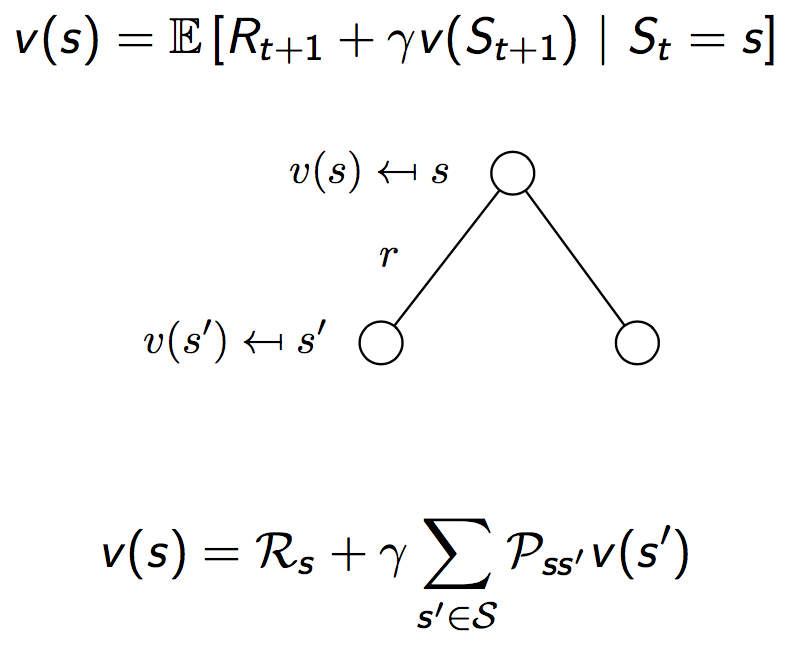

#### Markov Decision Process

###### Markov Decision Process $<S,A,P,R, \gamma>$
A Markov reward process with decisions (environment in which all states are Markov)
* $S$ is a finite set of states
* $A$ is a finite set of actions
* $P$ is a state transition probability matrix, $P_{ss'}^a=\mathbb{P}[S_{t+1}=s'|S_t=s, A_t=a]$
* $R$ is a reward function, $R_s^a=\mathbb{E}R_{t+1}|S_t=s, A_t-a]$
* $\gamma$ is a discount factor $\gamma \in [0,1]$

###### Policies $\pi(a|s)$
A policy $\pi$ is a distribution over actions given states
$$\pi(a|s) = \mathbb{P}[A_t=a|S_t-s]$$
* A policy fully defines the behaviour of an agent
* MDP policies depend on the current state i.e. policies are stationary (time-independent), $A_t \simeq \pi(.|S_t), \forall t > 0$
___
##### Given an MDP $M=<S,A,P,R,\gamma>$ and a policy $\pi$
* The state sequence $S_1, S_2, ...$ is a Markov process $<S,P^\pi>$z
* The state reward sequence $S_1, S_2, ...$ is a Markov reward process $<S,P^\pi, R^\pi, \gamma>$
$$ P_{ss'}^\pi = \sum_{a \in A} \pi(a|s) P_{ss'}^a$$
$$ R_s^\pi = \sum_{a \in A} \pi(a|s) R_{s}^a$$

###### Value Function

**state-value function $v_\pi(s)$**

The expected return starting from state $s$, and the following policy $\pi$
$$ v_\pi(s) = \mathbb{E}_\pi [G_t|S_t=2] $$

**action-value function $q_\pi(s,a)$**

The expected return starting from state $s$, taking action $a$, and then following policy $\pi$
$$ q_\pi(s,a) = \mathbb{E}_\pi [G_t|S_t=s, A_t=a\ $$

##### Bellman Expectation Equation
Both the state-value and action-value functions  can be decomposed into 2 parts:
* immediate reward $R_{t+1}$
* discounted value of successor state $\gamma v(S_{t+1})$

$$ v_\pi(s) = \mathbb{E}_\pi[R_{t+1}+\gamma v_\pi(S_{t+1})|S_t=s] $$
$$ q_\pi(s,a) = \mathbb{E}_\pi[R_{t+1}+\gamma q_\pi(S_{t+1})|S_t=s, A_t=a]$$
___
In Matrix Form: $v_\pi = R^\pi + \gamma P^\pi v_\pi$

Bellman Expectation Equation for $V^\pi$
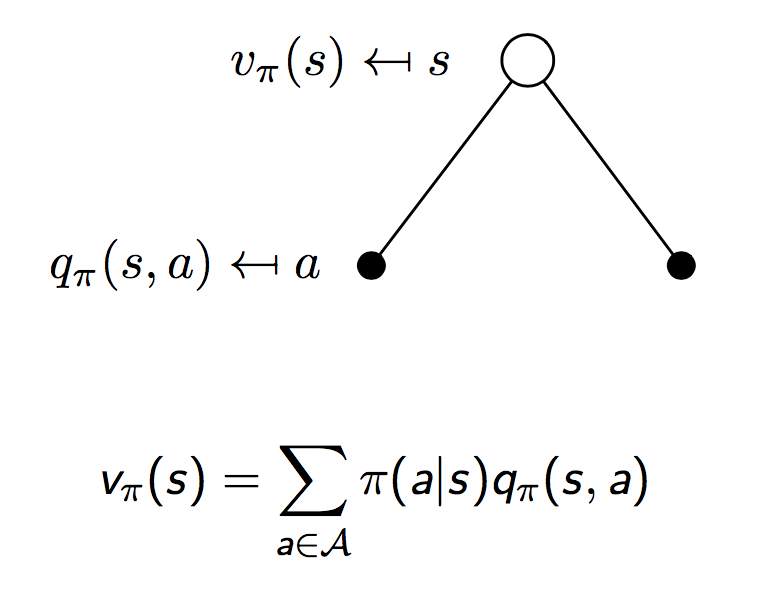

Bellman Expectation Equation for $Q^\pi$
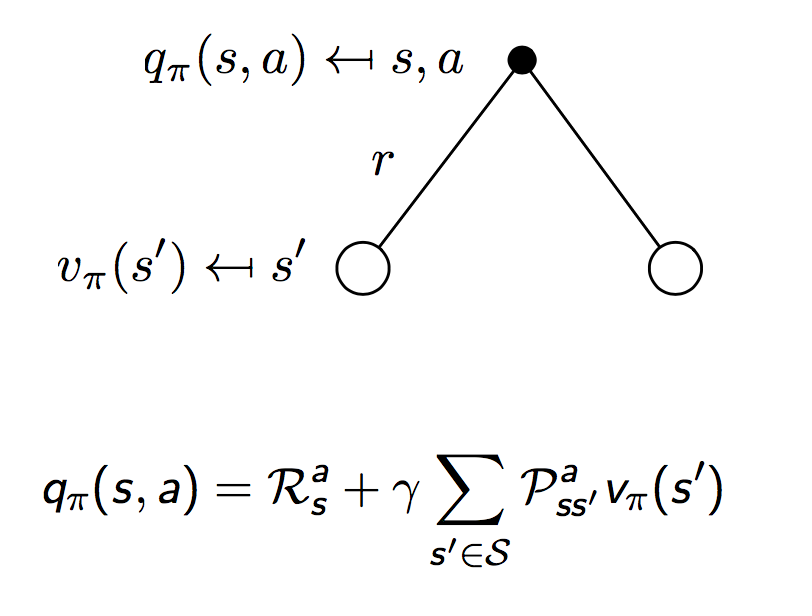

Bellman Expectation Equation for $v^\pi$ (2)
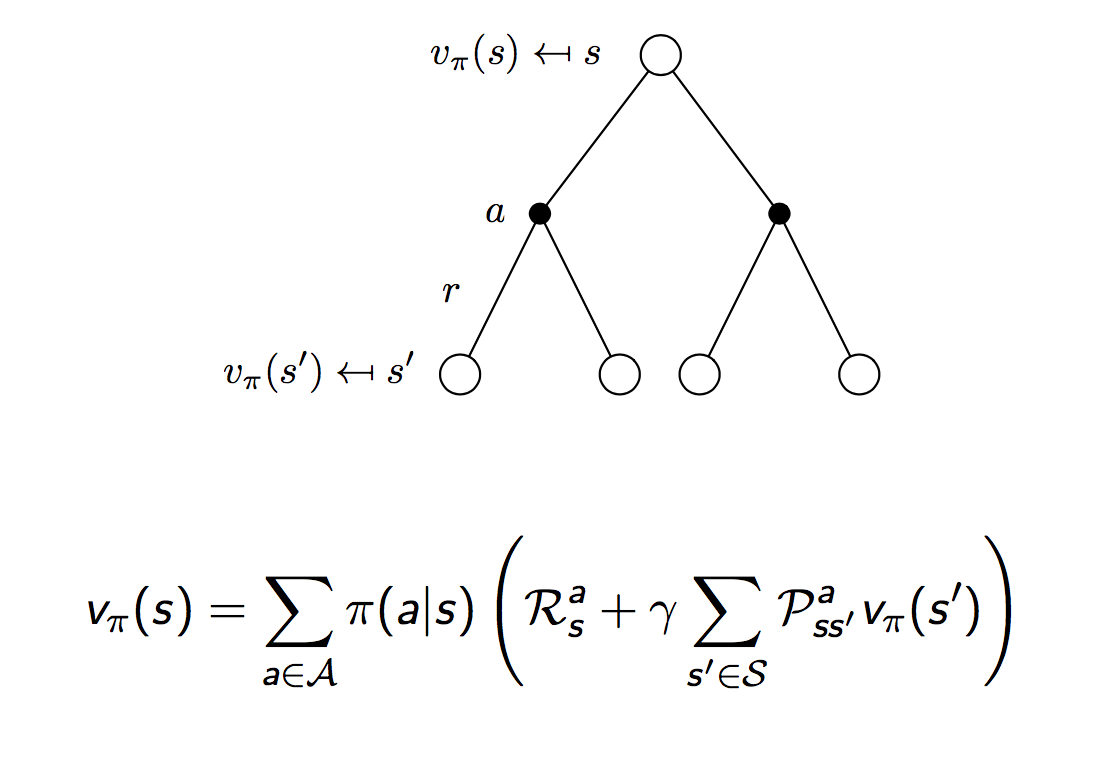

Bellman Expectation Equation for $q_\pi$ (2)
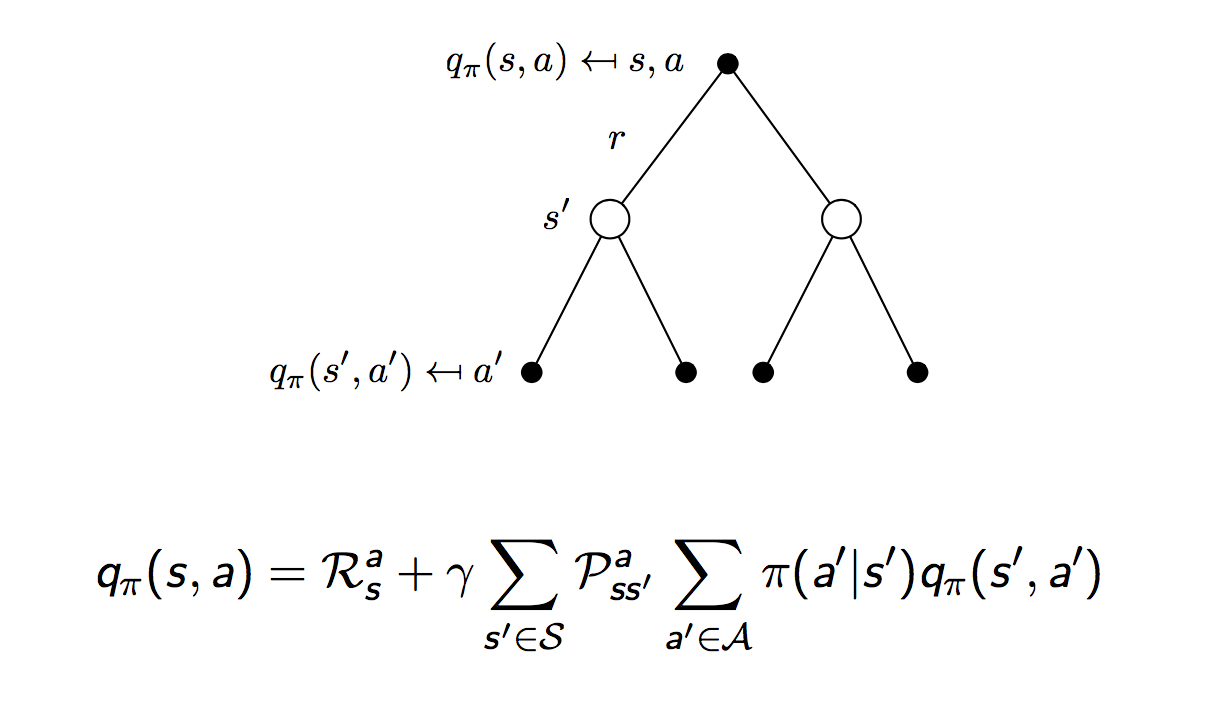

###### Optimal Value Function

**optimal state-value function $v_*(s)$**
The maximum value function over all policies
$$ v_*(s) = \max_{\pi} v_\pi(s)$$

**optimal action-value function $q_*(s,a)$**
The maximum action-value function over all policies
$$ q_*(s,a) = \max_{\pi} q_\pi(s,a)$$

###### Optimal Policy
Defines a partial ordering over policies $\pi \geq \pi' if v_\pi(s) \geq v_\pi'(s), \forall s$
___
** Theorem: **
* There exists an optimal policy $\pi_*$ that is better than or equal to all other policies, $\pi_* \geq \pi, \forall \pi$
* All optimal policies achieve the optimal value function, $v_{\pi*}(s) = v_*(s)$
* All optimal policies achieve the optimal action-value function, $q_{\pi*}(s,a) = q_*(s,a)$
___
An optimal policy can be found by maximising over $q_*(s,a)$,
$$ \pi_*(s|a) = \big\{1 if a=argmax_{a \in A} q_*(s,a),  0 otherwise$$

Bellman Optimality Equation for $v_*$

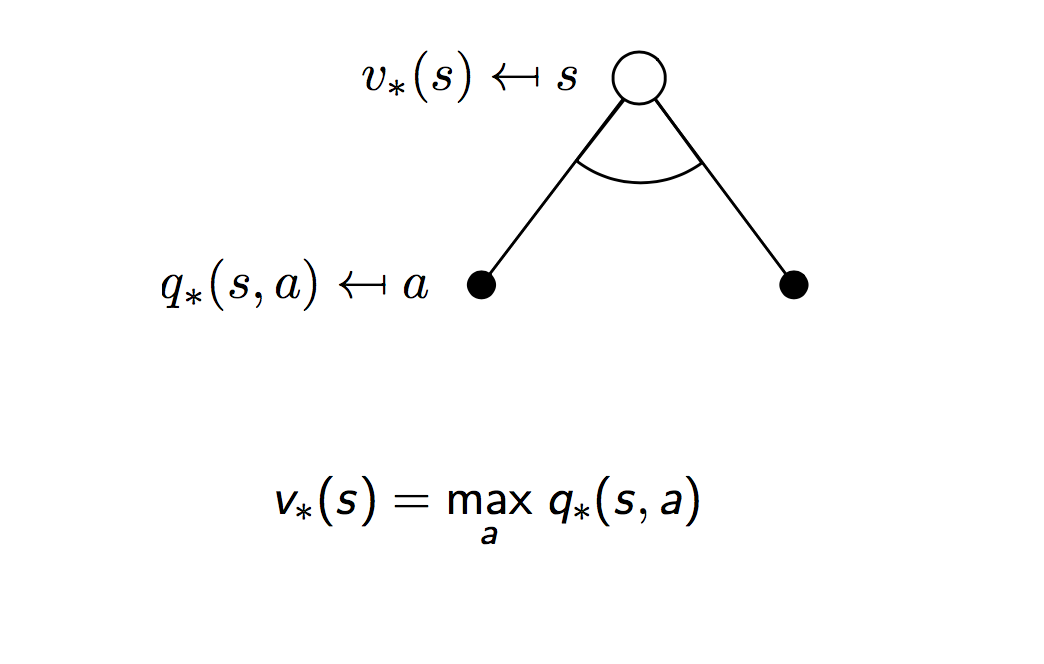

Bellman Optimality Equation for $q_*$
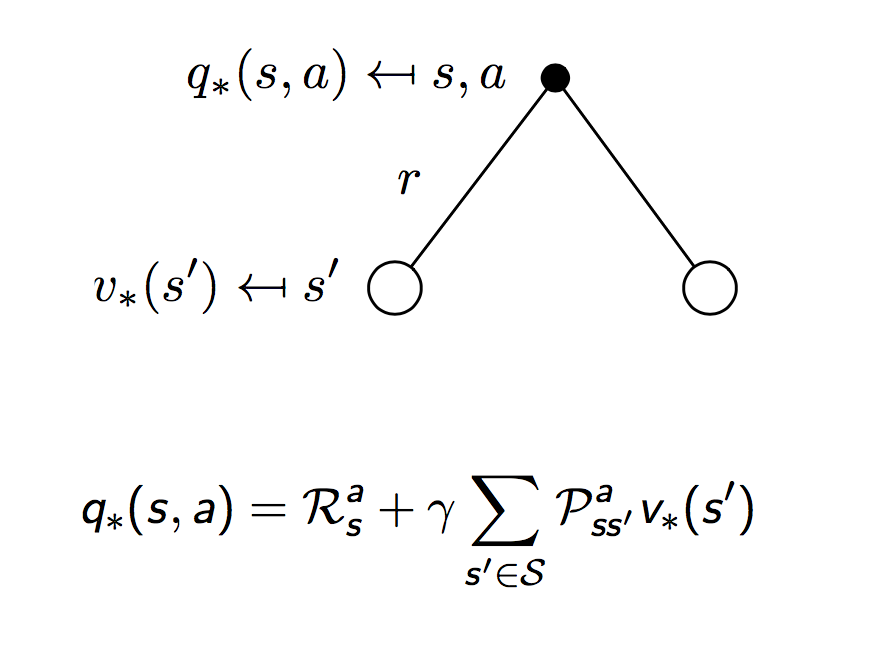

Bellman Optimality Equation for $v_*$ (2)
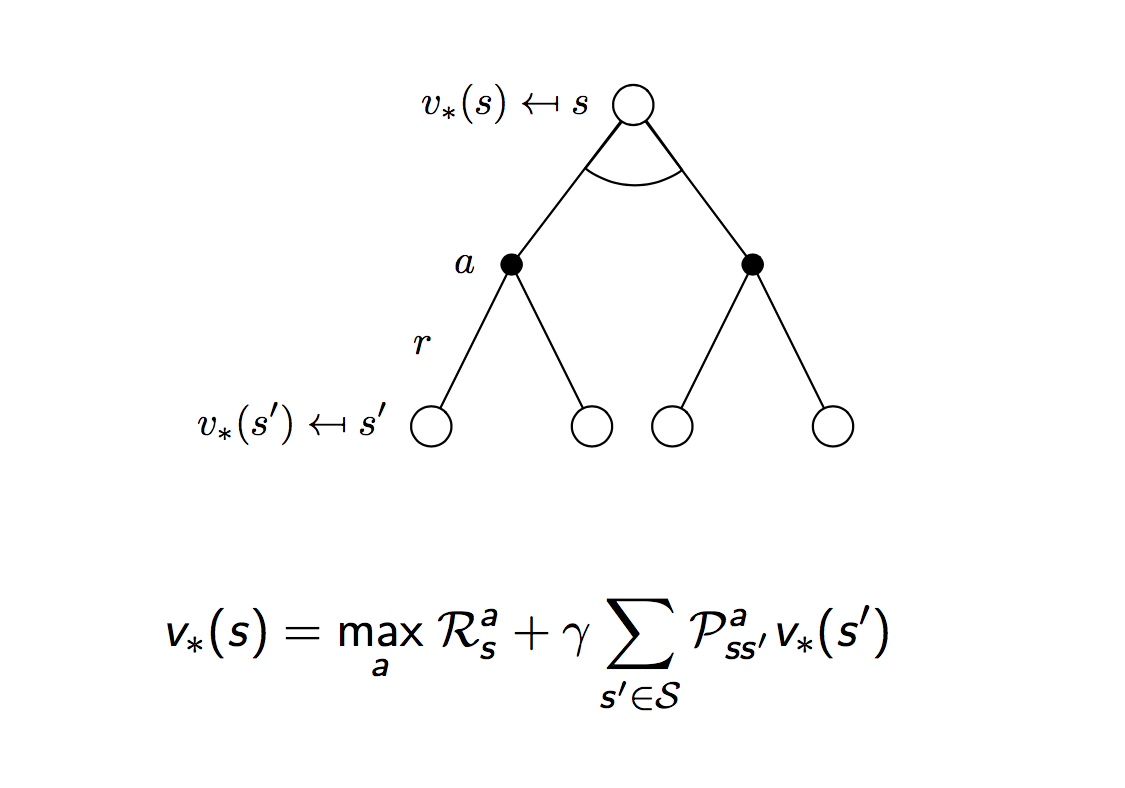

Bellman Optimality Equation for $q_*$
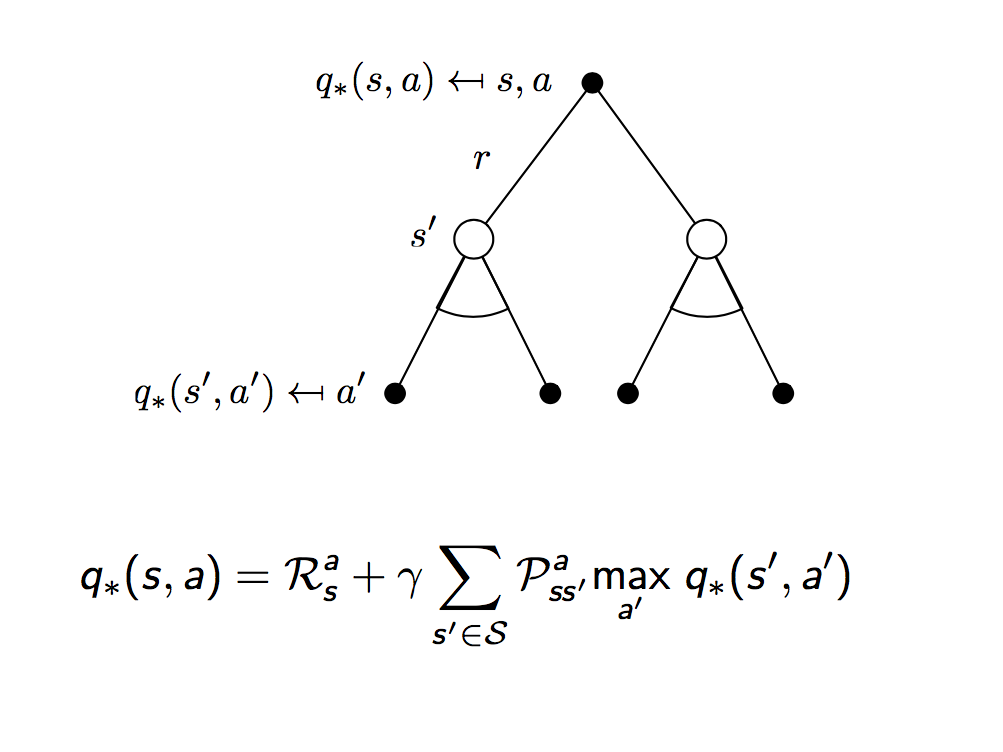

###### Bellman Optimality Equation
* Solving Bellman Optimality Equation is non-linear with no closed form solution (in general)
* Many iterative solution methods:
    * Value Iteration
    * Policy Iteration
    * Q-learning
    * Sarsa

#### Partially Observable Environments

Agent indirectly observes environment: $S_t^a \neq S_t^e$

Agent must construct its own state representation $(S_t^a)$ e.g.
* Complete history: $S_t^a = H_t$
* Beliefs of environment state: $S_t^a = (\mathbb{P}[S_t^e = s^1\, ..., \mathbb{P}[S_t^e = s^n])$
* Recurrent neural network: $S_t^a = \sigma(S_{t-1}^a W_s + O_t W_o)$

## Agent

### Agent Categories

##### Value Based
* No Policy (implicit)
* **Value Function** $\checkmark$

##### Policy Based: 
* **Policy** $\checkmark$
* No Value Function

##### Actor Critic:
* **Policy** $\checkmark$
* **Value Function** $\checkmark$

##### Model Free:
* **Policy and/ or Value Function** $\checkmark$
* No Model

##### Model Based:
* **Policy and/ or Value Function** $\checkmark$
* **Model** $\checkmark$

### Policy ($\pi$)

The agent's behaviour - A map from state to action e.g.
* Deterministic policy: $a=\pi(s)$
* Stochastic policy: $\pi(a|s) = \mathbb{P}[A_t=a|S_t=s]$

### Value Function (v)

Prediction of future reward, used to evaluate goodness of states and select between actions, e.g.
* $V_{\pi}(s) = \mathbb{E}_{\pi}[R_{t+1} + \gamma R_{t+2} + \gamma^2 R_{t+3} + ... | S_t = s] $

### Model (P, R)

Predicts what the environment will do next:
* $P$ predicts the next state (transition model), e.g. $P_{ss'}^a=\mathbb{P}[S_{t+1}=s'|S_t=s,A_t=a]$
* $R$ predicts the next (intermediate) reward, e.g. $R_s^a=\mathbb{E}[R_{t+1}|S_t=s,A_t=a]$

## Sequential Decision Making

2 fundamental problems in sequential decision making:

##### Reinforcement Learning:
* The environment is initially **unknown**
* The agent **interacts** with the environment
* The agent **improves** its policy

##### Planning:
* A model of the environment is **known**
* The agent **performs computations** with its model (without external interaction)
* The agent **improves** its policy (deliberation, reasoning, introspection, pondering, thought, search)

### Reinforcement Learning

##### Exploration

Finds more information about the environment

##### Exploitation

Exploits known information to maximise reward

### Planning

##### Prediction

Evaluate the future given a policy $\pi$

##### Control

Find the best policy $\pi_*$